## Seizure type clinical report analysis 

       FNSZ    Focal Non-Specific Seizure    
    This event should contain Lobe, Hemispheric and Focal seizures regardless of their location on the scalp 
    (e.g. Temporal Lobe seizure, Left hemispheric seizures, etc.)

        CPSZ    Complex Partial Seizure (Focal)    
        Seizure which contains Complex waves. (Harmful, could be non-convulsive seizures). Length: variable

        SPSZ    Simple Partial Seizure (Focal)    
        A Focal seizure containing simple waves which start from on area of the brain and (sometimes) spreads in 
        brain towards other lobes. (not harmful and Patient is conscious).  Length: variable

    GNSZ    Generalized Non-Specific Seizure    
    The seizures which occur over (almost) all the channels.

        ABSZ    Absence Seizure    
        Short brief seizures contains usually 3 to 6 Hz spike and wave complexes. 
        Length: typically 3-4 seconds to upto 11-12 seconds

        MYSZ    Myoclonic Seizure    
        very brief motor seizure event, which lasts about 1-2 seconds includes periodic jerks of muscles.  
        Length: 1-3 seconds

        TCSZ    Tonic-Clonic Seizure    
        The most severe Seizure includes stiffening in the beginning stage and jerking in later stage. 
        Length: variable

        TNSZ    Tonic Seizure    
        A type of a seizure which indicates stiffening of muscles. Length: variable


In [1]:
import re
import csv
import numpy as np     
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer, CountVectorizer

In [2]:
def get_all_files_by_type():
    # combine clinical reports of all patients by seizure type
    for seizure_type in types:
        
        all_file = []

        with open('../clips/types/TXT/{}.txt'.format(seizure_type), 'r') as src:  
             for line in src:
                    line = line.replace('https://www.isip.piconepress.com/projects/tuh_eeg/downloads/tuh_eeg_seizure/v1.5.2/edf/', '../clips/types/TXT/{}/'.format(seizure_type)).rstrip('\n')
                    if line not in all_file:
                        all_file.append(line)
            
        read_all_file = []

        for file in all_file:
            f = open(file, "r+", encoding='unicode_escape')
            contents= f.read()
            read_all_file.append(contents)
            all_words = "".join(read_all_file)

        f.close()
                   
        text_file = open("../clips/types/TXT/{}_all.txt".format(seizure_type), "w")
        text_file.write(all_words)
        text_file.close()

In [3]:
types = ['ABSZ','CPSZ','FNSZ','GNSZ','MYSZ','SPSZ','TCSZ','TNSZ']
get_all_files_by_type()

In [4]:
all_text_file = []
for seizure_type in types:
    all_text_file.append("../clips/types/TXT/{}_all.txt".format(seizure_type))

#  read the file for every seizure type combined in above step
read_all_files = []

for file in all_text_file:
    f = open(file, "r+", encoding='unicode_escape')
    contents= f.read()
    read_all_files.append(contents)

f.close()

In [5]:
# use TF-IDF to get word weight in every document, and calculate the pairwise similarity between documents for each seizure types
# no need to normalize, since Vectorizer will return normalized tf-idf

vect = TfidfVectorizer(stop_words='english') 
tfidf = vect.fit_transform(read_all_files)
pairwise_similarity = tfidf * tfidf.T
word=vect.get_feature_names()                    
weight=tfidf.toarray()                       

In [6]:
for i,t in zip(range(0, len(weight)),types):                  
    print( u"-------output",t,u"tf-idf weight------")
    df = pd.DataFrame([])
    for j in range(len(word)):
        if weight[i][j] != 0:
            df = df.append(pd.DataFrame({'word': word[j], 'freq': weight[i][j]}, index=[0]), ignore_index=True)

    
    df.to_csv('../clips/types/TXT/{}.csv'.format(t),encoding='utf-8-sig',index=False)
        

In [7]:
similarity = pairwise_similarity.toarray()

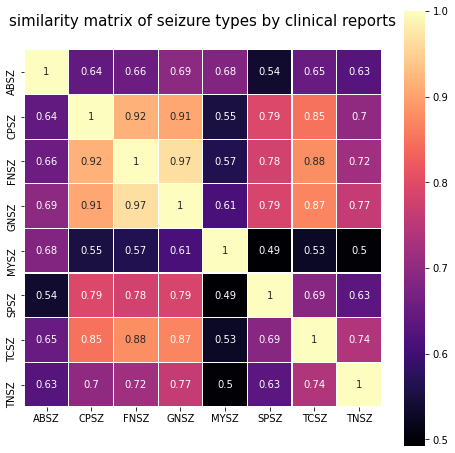

In [8]:
colormap = plt.cm.magma
plt.figure(figsize=(8,8))
plt.title('similarity matrix of seizure types by clinical reports', y=1.05, size=15)
sns.heatmap(similarity,linewidths=0.1,xticklabels = types, yticklabels = types, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)


    FNSZ & GNSZ have highest similarity of 0.97, followed with FNSZ & CPSZ (0.92), GNSZ & CPSZ (0.91)
    SPSZ & MYSZ have lowest similarity of 0.49, followed with MYSZ & TNSZ (0.5), MYSZ & TCSZ (0.53)

In [13]:
# print words with top 100 occurence for each seizure types and observe
pd.set_option('display.max_rows', 500)

df_final = {}
for i in types:
    tmp = pd.read_csv('../clips/types/TXT/{}.csv'.format(i),header=None, names=['word_{}'.format(i),'freq_{}'.format(i)]).sort_values(by = 'freq_{}'.format(i), ascending=False)[:100]
    tmp = tmp.reset_index(drop=True)
    df_final['type_{}'.format(i)] = tmp

In [14]:
df_list = [ v for k,v in df_final.items()] 
pd.concat(df_list ,axis=1)

,word_ABSZ,freq_ABSZ,word_CPSZ,freq_CPSZ,word_FNSZ,freq_FNSZ,word_GNSZ,freq_GNSZ,word_MYSZ,freq_MYSZ,word_SPSZ,freq_SPSZ,word_TCSZ,freq_TCSZ,word_TNSZ,freq_TNSZ
0,word,freq,word,freq,word,freq,word,freq,word,freq,word,freq,word,freq,word,freq
1,activity,0.3299751356092814,seizures,0.31815000541701854,eeg,0.30681639897364377,eeg,0.36543508827790994,activity,0.4513508752491221,seizures,0.4950341356563598,eeg,0.29126922471654126,seizures,0.31625961510559353
2,spike,0.24132509917693712,eeg,0.3110272441017122,left,0.27400922378218484,seizures,0.2386627348783333,wave,0.27081052514947324,activity,0.2560521391325999,right,0.2813395920557501,eeg,0.2513858479044461
3,wave,0.22162509108086062,patient,0.29045037807971597,right,0.253909053066291,patient,0.23811155073311777,spike,0.2407204667995318,eeg,0.2389819965237599,seizure,0.26638019852476646,seen,0.23567308841883317
4,child,0.21113601853554484,activity,0.24059104887257127,activity,0.25252283439622936,activity,0.23590681415225556,eeg,0.18054035009964883,left,0.2389819965237599,left,0.2647902042877648,patient,0.23516740610415932
5,eeg,0.20192508298478412,seizure,0.2388510529583708,seizures,0.23588821035548965,left,0.20944997518190916,clinical,0.18054035009964883,hemisphere,0.19080715824396544,patient,0.2316914287517942,spike,0.16218441800286848
6,clinical,0.1773000728646885,left,0.22871978001372728,patient,0.21717425830965748,clinical,0.1780324789046228,10,0.15045029174970737,patient,0.17923649739281994,activity,0.22838155119819714,recording,0.1540939424276986
7,seizure,0.1651525113906579,right,0.22001418285057503,seizure,0.19781844203974577,right,0.16866234843595843,patient,0.15045029174970737,clinical,0.17923649739281994,seizures,0.18535314300143535,seizure,0.1540939424276986
8,slow,0.157600064768612,clinical,0.1669891819477386,clinical,0.15872203772205817,seizure,0.1466328203166402,record,0.15045029174970737,right,0.14509621217513993,tonic,0.12839262369843238,wave,0.15407519710272505
9,record,0.157600064768612,partial,0.16573423142275726,slowing,0.1324815414704825,record,0.14055195702996534,myoclonus,0.1433297801824912,beta,0.11448429494637925,sleep,0.1158457143758971,activity,0.14596597620258164
